In [1]:
!pip install fastparquet
!pip install seaborn 
!pip install scikit-learn
!pip install joblib
!pip install scikit-learn statsmodels

In [2]:
import pandas as pd
import os
import time
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
import joblib
import xgboost as xgb
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Tratamiento de datos archivo features

In [3]:
#Lectura Archivo features
features = pd.read_parquet('features.parquet')

In [4]:
#Visualización primeros 5 datos
pd.set_option('display.max_columns', None)
features

frameTime  F0final_sma_stddev  F0final_sma_amean  \
0            15.0            96.07264          147.35590   
1            15.5           151.16670          295.13900   
2            16.0           148.98030          396.36610   
3            16.5           139.34050          422.96440   
4            17.0           113.54910          411.41420   
...           ...                 ...                ...   
107729       43.5            31.67118           96.38049   
107730       44.0            38.64713          104.26730   
107731       44.5            32.87891          107.80250   
107732       45.0            21.54884          103.30900   
107733       45.5            23.39016           86.73322   

        voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                               0.028202                         0.798873   
1                               0.053860                         0.819231   
2                               0.059307                         0.831506   
3                               0.045554                         0.854269   
4                               0.057506                         0.844544   
...                                  ...                              ...   
107729                          0.026829                         0.764021   
107730                          0.022817                         0.746685   
107731                          0.026324                         0.750153   
107732                          0.025532                         0.760932   
107733                          0.026599                         0.758811   

        jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                     0.076858               0.053690              0.087254   
1                     0.069150               0.043169              0.083064   
2                     0.083793               0.036604              0.070734   
3                     0.079606               0.023784              0.067368   
4                     0.037989               0.016478              0.043265   
...                        ...                    ...                   ...   
107729                0.132454               0.089783              0.127611   
107730                0.128434               0.103616              0.122983   
107731                0.092263               0.098635              0.097102   
107732                0.089142               0.104172              0.137765   
107733                0.108381               0.075134              0.187727   

        jitterDDP_sma_amean  shimmerLocal_sma_stddev  shimmerLocal_sma_amean  \
0                  0.060796                 0.162772                0.166187   
1                  0.052913                 0.170458                0.156541   
2                  0.028648                 0.144677                0.139546   
3                  0.019138                 0.136915                0.112530   
4                  0.016799                 0.076814                0.090581   
...                     ...                      ...                     ...   
107729             0.101909                 0.099672                0.168569   
107730             0.109100                 0.093243                0.176059   
107731             0.094832                 0.104262                0.187480   
107732             0.107494                 0.152725                0.204476   
107733             0.112816                 0.149811                0.183501   

        logHNR_sma_stddev  logHNR_sma_amean  audspec_lengthL1norm_sma_stddev  \
0                6.684725          9.871699                         1.033116   
1               13.980430          5.202932                         1.091978   
2               13.225220          2.112345                         0.580961   
3                6.642314          5.038079                         0.418070   
4               21.100110         -0.043818         

In [5]:
#Renombrar la columna numero_archivo por song_id
features = features.rename(columns={'numero_archivo': 'song_id'})
features.head()

frameTime  F0final_sma_stddev  F0final_sma_amean  \
0       15.0            96.07264           147.3559   
1       15.5           151.16670           295.1390   
2       16.0           148.98030           396.3661   
3       16.5           139.34050           422.9644   
4       17.0           113.54910           411.4142   

   voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                          0.028202                         0.798873   
1                          0.053860                         0.819231   
2                          0.059307                         0.831506   
3                          0.045554                         0.854269   
4                          0.057506                         0.844544   

   jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                0.076858               0.053690              0.087254   
1                0.069150               0.043169              0.083064   
2                0.083793               0.036604              0.070734   
3                0.079606               0.023784              0.067368   
4                0.037989               0.016478              0.043265   

   jitterDDP_sma_amean  shimmerLocal_sma_stddev  shimmerLocal_sma_amean  \
0             0.060796                 0.162772                0.166187   
1             0.052913                 0.170458                0.156541   
2             0.028648                 0.144677                0.139546   
3             0.019138                 0.136915                0.112530   
4             0.016799                 0.076814                0.090581   

   logHNR_sma_stddev  logHNR_sma_amean  audspec_lengthL1norm_sma_stddev  \
0           6.684725          9.871699                         1.033116   
1          13.980430          5.202932                         1.091978   
2          13.225220          2.112345                         0.580961   
3           6.642314          5.038079                         0.418070   
4          21.100110         -0.043818                         0.355658   

   audspec_lengthL1norm_sma_amean  audspecRasta_lengthL1norm_sma_stddev  \
0                        0.884885                              2.138395   
1                        1.558766                              2.088521   
2                        1.791262                              0.531910   
3                        1.631800                              0.493738   
4                        1.341145                              0.642186   

   audspecRasta_lengthL1norm_sma_amean  pcm_RMSenergy_sma_stddev  \
0                             1.648048                  0.038997   
1                             1.812327                  0.041081   
2                             1.183906                  0.030281   
3                             1.162006                  0.027339   
4                             1.172557                  0.019418   

   pcm_RMSenergy_sma_amean  pcm_zcr_sma_stddev  pcm_zcr_sma_amean  \
0                 0.048751            0.020681           0.025067   
1                 0.058792            0.020551           0.043298   
2                 0.064808            0.011808           0.048488   
3                 0.060076            0.025651           0.063923   
4                 0.043402            0.031968           0.085723   

   audSpec_Rfilt_sma[0]_stddev  audSpec_Rfilt_sma[0]_amean  \
0                     0.031082                    0.138407   
1                     0.031232                    0.123020   
2                     0.053660                    0.140735   
3                     0.049680                    0.141885   
4                     0.022844                    0.113691   

   audSpec_Rfilt_sma[1]_stddev  audSpec_Rfilt_sma[1]_amean  \
0                     0.096836                    0.283886   
1                     0.108467                    0.253580   
2                     0.134552                    0.286956

Tratamiento de datos archivo arousal

In [6]:
#Lectura y visualización archivo arousal
df = pd.read_csv('arousal.csv')
df

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0           2       -0.109386       -0.114942   -1.164126e-01       -0.118613   
1           3       -0.110846       -0.123973   -1.311026e-01       -0.135956   
2           4        0.222327        0.179446    1.783881e-01        0.184056   
3           5       -0.255613       -0.251579   -2.519577e-01       -0.251124   
4           7        0.464234        0.460789    4.609907e-01        0.461046   
...       ...             ...             ...             ...             ...   
1797     2054       -0.190000       -0.182000   -1.800000e-01       -0.158000   
1798     2055       -0.070000       -0.086000   -1.100000e-01       -0.072000   
1799     2056       -0.044000       -0.044000   -4.400000e-02       -0.044000   
1800     2057        0.413333        0.413333    4.116667e-01        0.410000   
1801     2058        0.008000        0.002000   -2.775558e-18        0.006000   

      sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0      -1.264569e-01       -0.133199       -0.136855       -0.144713   
1      -1.407755e-01       -0.144664       -0.163118       -0.165218   
2       1.760421e-01        0.178720        0.176345        0.175793   
3      -2.507627e-01       -0.251957       -0.251957       -0.251957   
4       4.572397e-01        0.465702        0.471809        0.469918   
...              ...             ...             ...             ...   
1797   -1.560000e-01       -0.150000       -0.152000       -0.150000   
1798   -6.200000e-02       -0.062000       -0.076000       -0.062000   
1799   -4.200000e-02       -0.046000       -0.050000       -0.052000   
1800    4.066667e-01        0.410000        0.401667        0.371667   
1801   -5.551115e-18        0.002000        0.002000        0.002000   

      sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0          -0.138985   -1.376024e-01       -0.138575       -0.140522   
1          -0.158858   -1.567828e-01       -0.160081       -0.169374   
2           0.176154    1.766041e-01        0.180138        0.176360   
3          -0.251957   -2.519567e-01       -0.250848       -0.247444   
4           0.473377    4.700510e-01        0.464498        0.471905   
...              ...             ...             ...             ...   
1797       -0.150000   -1.460000e-01       -0.152000       -0.154000   
1798       -0.042000   -4.600000e-02       -0.018000       -0.024000   
1799       -0.052000   -5.400000e-02       -0.054000       -0.056000   
1800        0.340000    3.283333e-01        0.328333        0.338333   
1801        0.006000   -5.551115e-18       -0.030000       -0.070000   

      sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0          -0.144348       -0.150365       -0.152446   -1.534950e-01   
1          -0.165857       -0.164108       -0.161764   -1.624463e-01   
2           0.168876        0.171422        0.169539    1.684931e-01   
3          -0.242066       -0.241087       -0.241087   -2.410867e-01   
4           0.477970        0.449070        0.403073    3.940040e-01   
...              ...             ...             ...             ...   
1797       -0.158000       -0.164000       -0.166000   -1.760000e-01   
1798       -0.014000       -0.012000       -0.008000   -4.163336e-18   
1799       -0.060000       -0.060000       -0.060000   -6.000000e-02   
1800        0.318333        0.301667        0.291667    2.783333e-01   
1801       -0.086000        0.006000        0.068000    8.400000e-02   

      sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0          -0.155344       -0.153442       -0.147347       -0.146429   
1          -0.170079       -0.168090       -0.164870       -0.161530   
2           0.169783        0.173216        0.164226        0.165260   
3          -0.238962       -0.239783       -0.237609       -0.237609   
4           0.398359        0.393433        0.392229        0.386149   
...   

In [7]:
# Mantener todas las columnas hasta sample_44500ms (inclusive)
arousal = df.loc[:, :'sample_44500ms']
arousal.head()

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0        2       -0.109386       -0.114942       -0.116413       -0.118613   
1        3       -0.110846       -0.123973       -0.131103       -0.135956   
2        4        0.222327        0.179446        0.178388        0.184056   
3        5       -0.255613       -0.251579       -0.251958       -0.251124   
4        7        0.464234        0.460789        0.460991        0.461046   

   sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0       -0.126457       -0.133199       -0.136855       -0.144713   
1       -0.140775       -0.144664       -0.163118       -0.165218   
2        0.176042        0.178720        0.176345        0.175793   
3       -0.250763       -0.251957       -0.251957       -0.251957   
4        0.457240        0.465702        0.471809        0.469918   

   sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0       -0.138985       -0.137602       -0.138575       -0.140522   
1       -0.158858       -0.156783       -0.160081       -0.169374   
2        0.176154        0.176604        0.180138        0.176360   
3       -0.251957       -0.251957       -0.250848       -0.247444   
4        0.473377        0.470051        0.464498        0.471905   

   sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0       -0.144348       -0.150365       -0.152446       -0.153495   
1       -0.165857       -0.164108       -0.161764       -0.162446   
2        0.168876        0.171422        0.169539        0.168493   
3       -0.242066       -0.241087       -0.241087       -0.241087   
4        0.477970        0.449070        0.403073        0.394004   

   sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0       -0.155344       -0.153442       -0.147347       -0.146429   
1       -0.170079       -0.168090       -0.164870       -0.161530   
2        0.169783        0.173216        0.164226        0.165260   
3       -0.238962       -0.239783       -0.237609       -0.237609   
4        0.398359        0.393433        0.392229        0.386149   

   sample_25000ms  sample_25500ms  sample_26000ms  sample_26500ms  \
0       -0.143975       -0.141597       -0.140725       -0.140686   
1       -0.161725       -0.171526       -0.172795       -0.172407   
2        0.172209        0.177908        0.185147        0.215622   
3       -0.237609       -0.237609       -0.236711       -0.235870   
4        0.385554        0.384041        0.385499        0.381375   

   sample_27000ms  sample_27500ms  sample_28000ms  sample_28500ms  \
0       -0.139947       -0.147282       -0.157786       -0.164249   
1       -0.169303       -0.172701       -0.174472       -0.168315   
2        0.256678        0.263116        0.246703        0.243829   
3       -0.235870       -0.235870       -0.234921       -0.232773   
4        0.377777        0.370106        0.346994        0.349432   

   sample_29000ms  sample_29500ms  sample_30000ms  sample_30500ms  \
0       -0.168293       -0.164517       -0.157689       -0.153775   
1       -0.166760       -0.164218       -0.164253       -0.174865   
2        0.248545        0.249931        0.262921        0.260946   
3       -0.230218       -0.230182       -0.226740       -0.226740   
4        0.351037        0.342570        0.343068        0.346314   

   sample_31000ms  sample_31500ms  sample_32000ms  sample_32500ms  \
0       -0.207365       -0.253384       -0.256741       -0.254217   
1       -0.181806       -0.181193       -0.185401       -0.183284   
2        0.271850        0.265925        0.274905        0.270707   
3       -0.227618       -0.228476       -0.226738       -0.224566   
4        0.341944        0.339297        0.336535        0.331994   

   sample_33000ms  sample_33500ms  sample_34000ms  sample_34500ms  \
0       -0.252781       -0.258112       -0.263372       -0.270176   
1       -0.195656       -0.204603       -0.201497       -0.200207   
2      

In [8]:
#Transponer columnas sample

# Identificar las columnas de sample
sample_columns = [col for col in arousal.columns if col.startswith("sample_")]

# Usar melt para transponer las columnas de sample en una sola columna llamada "arousal"
df_melted = arousal.melt(id_vars=["song_id"],
                    value_vars=sample_columns,
                    var_name="sample",
                    value_name="arousal")

# Extraer solo el número del sample (por ejemplo, de "sample_1500" a "1500")
df_melted["sample"] = df_melted["sample"].str.extract(r'(\d+)').astype(int)

# Ordenar por "song_id" y luego por "sample" para asegurar que los datos estén bien organizados
df_melted_arousal = df_melted.sort_values(by=["song_id", "sample"]).reset_index(drop=True)

# Mostrar el resultado para verificar


In [9]:
#Visualización del dataset transpuesto
df_melted_arousal

song_id  sample   arousal
0             2   15000 -0.109386
1             2   15500 -0.114942
2             2   16000 -0.116413
3             2   16500 -0.118613
4             2   17000 -0.126457
...         ...     ...       ...
108115     2058   42500 -0.016000
108116     2058   43000  0.018000
108117     2058   43500  0.054000
108118     2058   44000  0.070000
108119     2058   44500  0.064000

[108120 rows x 3 columns]

In [10]:
#Se realiza el merge del dataframe df_limpio y arousal
df_farousal = pd.merge(features, df_melted_arousal, on='song_id', how='inner')
df_farousal

frameTime  F0final_sma_stddev  F0final_sma_amean  \
0             15.0            96.07264          147.35590   
1             15.0            96.07264          147.35590   
2             15.0            96.07264          147.35590   
3             15.0            96.07264          147.35590   
4             15.0            96.07264          147.35590   
...            ...                 ...                ...   
6464035       45.5            23.39016           86.73322   
6464036       45.5            23.39016           86.73322   
6464037       45.5            23.39016           86.73322   
6464038       45.5            23.39016           86.73322   
6464039       45.5            23.39016           86.73322   

         voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                                0.028202                         0.798873   
1                                0.028202                         0.798873   
2                                0.028202                         0.798873   
3                                0.028202                         0.798873   
4                                0.028202                         0.798873   
...                                   ...                              ...   
6464035                          0.026599                         0.758811   
6464036                          0.026599                         0.758811   
6464037                          0.026599                         0.758811   
6464038                          0.026599                         0.758811   
6464039                          0.026599                         0.758811   

         jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                      0.076858               0.053690              0.087254   
1                      0.076858               0.053690              0.087254   
2                      0.076858               0.053690              0.087254   
3                      0.076858               0.053690              0.087254   
4                      0.076858               0.053690              0.087254   
...                         ...                    ...                   ...   
6464035                0.108381               0.075134              0.187727   
6464036                0.108381               0.075134              0.187727   
6464037                0.108381               0.075134              0.187727   
6464038                0.108381               0.075134              0.187727   
6464039                0.108381               0.075134              0.187727   

         jitterDDP_sma_amean  shimmerLocal_sma_stddev  shimmerLocal_sma_amean  \
0                   0.060796                 0.162772                0.166187   
1                   0.060796                 0.162772                0.166187   
2                   0.060796                 0.162772                0.166187   
3                   0.060796                 0.162772                0.166187   
4                   0.060796                 0.162772                0.166187   
...                      ...                      ...                     ...   
6464035             0.112816                 0.149811                0.183501   
6464036             0.112816                 0.149811                0.183501   
6464037             0.112816                 0.149811                0.183501   
6464038             0.112816                 0.149811                0.183501   
6464039             0.112816                 0.149811                0.183501   

         logHNR_sma_stddev  logHNR_sma_amean  audspec_lengthL1norm_sma_stddev  \
0                 6.684725          9.871699                         1.033116   
1                 6.684725          9.871699                         1.033116   
2                 6.684725          9.871699                         1.033116   
3                 6.684725          9.871699                         1.033116   


Tratamiento datos dataset features y arousal

Distribución original de arousal:
arousal_sign
positivo    0.65969
negativo    0.34031
Name: proportion, dtype: float64
Total de valores positivos disponibles: 4264260
Total de valores negativos disponibles: 2199780

Distribución en la muestra balanceada:
arousal_sign
negativo    0.5
positivo    0.5
Name: proportion, dtype: float64


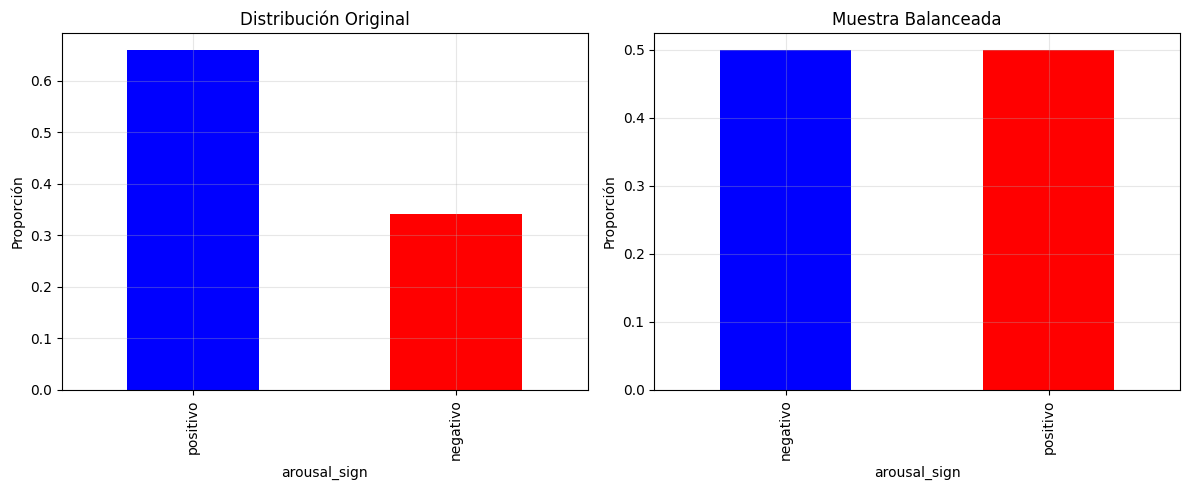

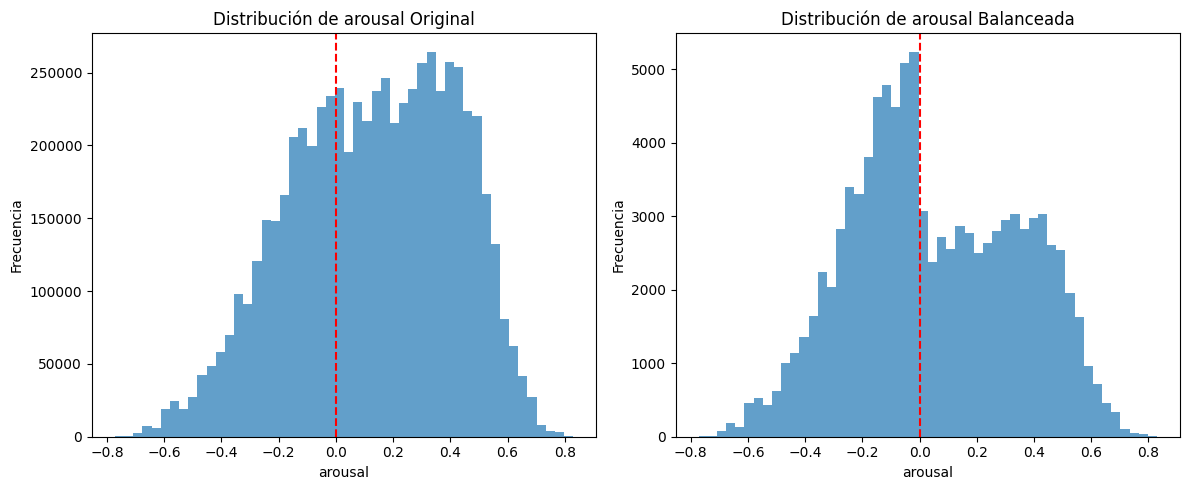


Dimensiones de la muestra balanceada: (100000, 264)


In [11]:
# 1. Primero, analizar la distribución de arousal en todo el conjunto
# Clasificar como positivo o negativo
df_farousal['arousal_sign'] = np.where(df_farousal['arousal'] >= 0, 'positivo', 'negativo')

# Ver la distribución actual
distribucion_original = df_farousal['arousal_sign'].value_counts(normalize=True)
print("Distribución original de arousal:")
print(distribucion_original)

# 2. Definir el tamaño de muestra que deseas
sample_size = 100000

# 3. Calcular cuántas muestras tomar de cada grupo para tener un 50/50
# (o puedes usar otra proporción si lo prefieres)
n_positivos = int(sample_size * 0.5)
n_negativos = sample_size - n_positivos

# 4. Dividir el DataFrame original por el signo de arousal
df_positivos = df_farousal[df_farousal['arousal'] >= 0]
df_negativos = df_farousal[df_farousal['arousal'] < 0]

print(f"Total de valores positivos disponibles: {len(df_positivos)}")
print(f"Total de valores negativos disponibles: {len(df_negativos)}")

# 5. Tomar muestras aleatorias de cada grupo
positivos_sample = df_positivos.sample(n=n_positivos, random_state=42)
negativos_sample = df_negativos.sample(n=n_negativos, random_state=42)

# 6. Combinar las muestras
df_balanced_sample = pd.concat([positivos_sample, negativos_sample])

# 7. Barajar los datos para evitar que estén agrupados por clase
df_balanced_sample = df_balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# 8. Verificar la distribución en la muestra balanceada
distribucion_balanceada = df_balanced_sample['arousal_sign'].value_counts(normalize=True)
print("\nDistribución en la muestra balanceada:")
print(distribucion_balanceada)

# 9. Visualizar la distribución
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
distribucion_original.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución Original')
plt.ylabel('Proporción')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
distribucion_balanceada.plot(kind='bar', color=['blue', 'red'])
plt.title('Muestra Balanceada')
plt.ylabel('Proporción')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 10. Visualizar la distribución de valores en ambos conjuntos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_farousal['arousal'], bins=50, alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de arousal Original')
plt.xlabel('arousal')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df_balanced_sample['arousal'], bins=50, alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de arousal Balanceada')
plt.xlabel('arousal')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 11. Eliminar la columna auxiliar si ya no la necesitas
df_balanced_sample = df_balanced_sample.drop('arousal_sign', axis=1)

# 12. Esta es tu muestra balanceada para usar en el entrenamiento
print(f"\nDimensiones de la muestra balanceada: {df_balanced_sample.shape}")

# Usar esta muestra para el entrenamiento del modelo
df_s_arousal = df_balanced_sample

In [12]:
df_s_arousal

frameTime  F0final_sma_stddev  F0final_sma_amean  \
0           20.5            10.03542           67.90661   
1           40.5            56.00285          163.04840   
2           26.5            35.34735           77.55994   
3           23.0            35.97010           96.70166   
4           25.0            79.48246           93.33115   
...          ...                 ...                ...   
99995       25.0            78.21185          137.88190   
99996       38.5            21.04218           75.68720   
99997       24.0            29.86192          134.86670   
99998       26.5            19.57511          101.81390   
99999       38.5            21.93424          122.91800   

       voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                              0.023361                         0.795304   
1                              0.027077                         0.787783   
2                              0.047582                         0.748566   
3                              0.020627                         0.768390   
4                              0.038208                         0.703756   
...                                 ...                              ...   
99995                          0.031341                         0.801466   
99996                          0.015176                         0.753660   
99997                          0.022171                         0.791899   
99998                          0.022677                         0.775415   
99999                          0.036229                         0.808357   

       jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                    0.093888               0.063770              0.059298   
1                    0.142057               0.118560              0.193416   
2                    0.198952               0.087936              0.132757   
3                    0.167667               0.116330              0.171690   
4                    0.023565               0.014456              0.013754   
...                       ...                    ...                   ...   
99995                0.107087               0.084798              0.099629   
99996                0.154852               0.107960              0.233117   
99997                0.080064               0.041861              0.146417   
99998                0.106007               0.038471              0.175612   
99999                0.169861               0.080125              0.105566   

       jitterDDP_sma_amean  shimmerLocal_sma_stddev  shimmerLocal_sma_amean  \
0                 0.048754                 0.234818                0.242233   
1                 0.142667                 0.103701                0.201093   
2                 0.071507                 0.109203                0.118171   
3                 0.158916                 0.112406                0.157551   
4                 0.009516                 0.112002                0.102134   
...                    ...                      ...                     ...   
99995             0.080750                 0.091500                0.178374   
99996             0.152912                 0.145712                0.247262   
99997             0.077149                 0.107673                0.175862   
99998             0.062123                 0.084560                0.143498   
99999             0.062235                 0.125825                0.166638   

       logHNR_sma_stddev  logHNR_sma_amean  audspec_lengthL1norm_sma_stddev  \
0               4.938577          8.604827                         0.142206   
1               3.817234          5.734976                         0.528717   
2              37.493730         -8.201964                         0.558492   
3               2.575318          6.418639                         0.637961   
4              53.740830        -36.299400                         0.166382   
...                  ... 

Número de valores negativos: 50000 (50.00%)
Número de valores positivos: 50000 (50.00%)


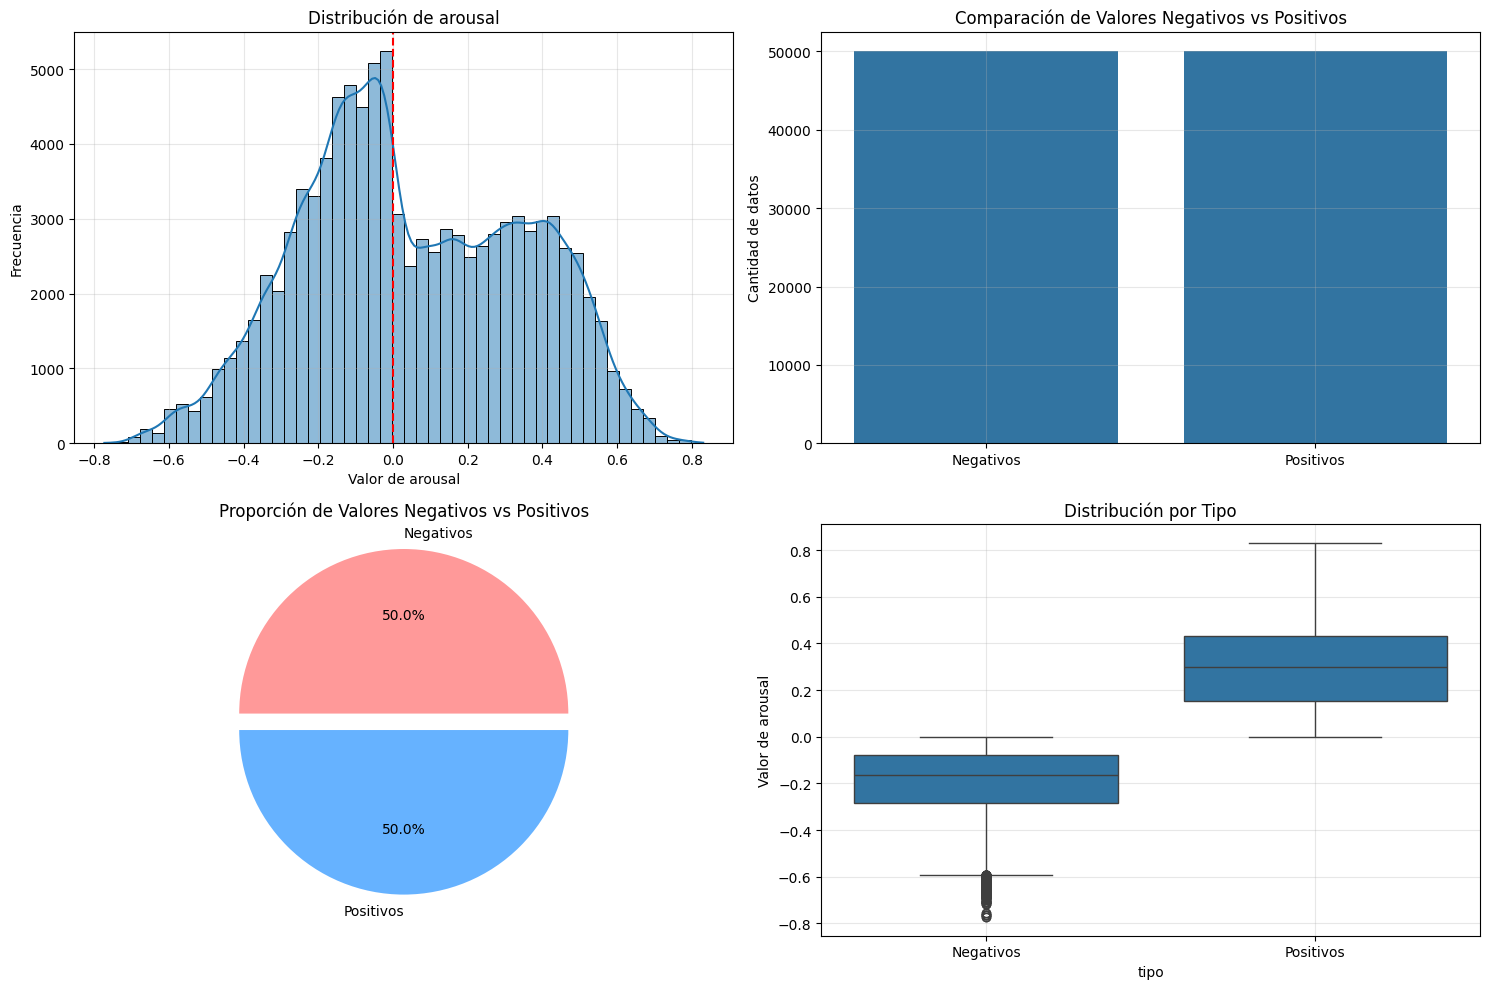


Estadísticas para valores negativos:
count    5.000000e+04
mean    -1.968727e-01
std      1.468932e-01
min     -7.723510e-01
25%     -2.838510e-01
50%     -1.650580e-01
75%     -7.831162e-02
max     -2.775558e-18
Name: arousal, dtype: float64

Estadísticas para valores positivos:
count    50000.000000
mean         0.298209
std          0.173790
min          0.000000
25%          0.152000
50%          0.299000
75%          0.433000
max          0.830000
Name: arousal, dtype: float64


In [14]:
# Primero, veamos cuántos valores negativos y positivos hay
valores_negativos = df_s_arousal[df_s_arousal['arousal'] < 0]
valores_positivos = df_s_arousal[df_s_arousal['arousal'] >= 0]

num_negativos = len(valores_negativos)
num_positivos = len(valores_positivos)

print(f"Número de valores negativos: {num_negativos} ({num_negativos/len(df_s_arousal)*100:.2f}%)")
print(f"Número de valores positivos: {num_positivos} ({num_positivos/len(df_s_arousal)*100:.2f}%)")

# Crear una visualización más completa
plt.figure(figsize=(15, 10))

# 1. Histograma general con separación de valores positivos y negativos
plt.subplot(2, 2, 1)
sns.histplot(df_s_arousal['arousal'], bins=50, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de arousal')
plt.xlabel('Valor de arousal')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# 2. Gráfico de barras comparando cantidad de valores negativos y positivos
plt.subplot(2, 2, 2)
sns.barplot(x=['Negativos', 'Positivos'], y=[num_negativos, num_positivos])
plt.title('Comparación de Valores Negativos vs Positivos')
plt.ylabel('Cantidad de datos')
plt.grid(True, alpha=0.3)

# 3. Gráfico de pastel mostrando la proporción
plt.subplot(2, 2, 3)
plt.pie([num_negativos, num_positivos], 
        labels=['Negativos', 'Positivos'], 
        autopct='%1.1f%%', 
        colors=['#FF9999', '#66B2FF'],
        explode=[0.1, 0])
plt.title('Proporción de Valores Negativos vs Positivos')

# 4. Boxplot para ver la distribución de valores negativos y positivos
plt.subplot(2, 2, 4)
# Creamos una columna temporal para identificar negativos y positivos
temp_df = pd.DataFrame({
    'arousal': df_s_arousal['arousal'],
    'tipo': np.where(df_s_arousal['arousal'] < 0, 'Negativos', 'Positivos')
})
sns.boxplot(x='tipo', y='arousal', data=temp_df)
plt.title('Distribución por Tipo')
plt.ylabel('Valor de arousal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Adicionalmente, si quieres ver estadísticas para ambos grupos:
print("\nEstadísticas para valores negativos:")
print(valores_negativos['arousal'].describe())

print("\nEstadísticas para valores positivos:")
print(valores_positivos['arousal'].describe())



In [15]:
df_s_arousal

frameTime  F0final_sma_stddev  F0final_sma_amean  \
0           20.5            10.03542           67.90661   
1           40.5            56.00285          163.04840   
2           26.5            35.34735           77.55994   
3           23.0            35.97010           96.70166   
4           25.0            79.48246           93.33115   
...          ...                 ...                ...   
99995       25.0            78.21185          137.88190   
99996       38.5            21.04218           75.68720   
99997       24.0            29.86192          134.86670   
99998       26.5            19.57511          101.81390   
99999       38.5            21.93424          122.91800   

       voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                              0.023361                         0.795304   
1                              0.027077                         0.787783   
2                              0.047582                         0.748566   
3                              0.020627                         0.768390   
4                              0.038208                         0.703756   
...                                 ...                              ...   
99995                          0.031341                         0.801466   
99996                          0.015176                         0.753660   
99997                          0.022171                         0.791899   
99998                          0.022677                         0.775415   
99999                          0.036229                         0.808357   

       jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                    0.093888               0.063770              0.059298   
1                    0.142057               0.118560              0.193416   
2                    0.198952               0.087936              0.132757   
3                    0.167667               0.116330              0.171690   
4                    0.023565               0.014456              0.013754   
...                       ...                    ...                   ...   
99995                0.107087               0.084798              0.099629   
99996                0.154852               0.107960              0.233117   
99997                0.080064               0.041861              0.146417   
99998                0.106007               0.038471              0.175612   
99999                0.169861               0.080125              0.105566   

       jitterDDP_sma_amean  shimmerLocal_sma_stddev  shimmerLocal_sma_amean  \
0                 0.048754                 0.234818                0.242233   
1                 0.142667                 0.103701                0.201093   
2                 0.071507                 0.109203                0.118171   
3                 0.158916                 0.112406                0.157551   
4                 0.009516                 0.112002                0.102134   
...                    ...                      ...                     ...   
99995             0.080750                 0.091500                0.178374   
99996             0.152912                 0.145712                0.247262   
99997             0.077149                 0.107673                0.175862   
99998             0.062123                 0.084560                0.143498   
99999             0.062235                 0.125825                0.166638   

       logHNR_sma_stddev  logHNR_sma_amean  audspec_lengthL1norm_sma_stddev  \
0               4.938577          8.604827                         0.142206   
1               3.817234          5.734976                         0.528717   
2              37.493730         -8.201964                         0.558492   
3               2.575318          6.418639                         0.637961   
4              53.740830        -36.299400                         0.166382   
...                  ... 

MODELO AROUSAL  SIN PCA

In [16]:
def entrenar_modelo_con_todas_caracteristicas(X, y_arousal):
    """
    Entrena un modelo utilizando todas las características disponibles.
    
    Parámetros:
    -----------
    X : DataFrame
        Características completas
    y_arousal : Series
        Variable objetivo (arousal)
        
    Retorna:
    --------
    resultados : dict
        Diccionario con los resultados de evaluación para cada modelo
    mejor_modelo : object
        El mejor modelo entrenado
    componentes : dict
        Componentes necesarios para usar el modelo
    """
    print("\nEntrenando modelos con TODAS las características originales...")
    print(f"Dimensión de datos para entrenamiento: {X.shape}")
    
    # Definir modelos para evaluar
    modelos = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
    }
    
    # Configurar validación cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Resultados por modelo
    resultados = {}
    
    for nombre, modelo in modelos.items():
        inicio = time.time()  # Medir tiempo de ejecución
        print(f"\nEvaluando {nombre}...")
        
        # Métricas por fold
        r2_scores = []
        rmse_scores = []
        ccc_scores = []
        
        # Validación cruzada
        for i, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y_arousal.iloc[train_idx], y_arousal.iloc[test_idx]
            
            # Escalar características
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Entrenar modelo
            modelo.fit(X_train_scaled, y_train)
            
            # Predecir
            y_pred = modelo.predict(X_test_scaled)
            
            # Calcular métricas
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            ccc = calcular_ccc(y_test, y_pred)
            
            # Guardar métricas
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            ccc_scores.append(ccc)
            
            print(f"  Fold {i+1}: R²={r2:.4f}, RMSE={rmse:.4f}, CCC={ccc:.4f}")
        
        # Promedios
        r2_medio = np.mean(r2_scores)
        rmse_medio = np.mean(rmse_scores)
        ccc_medio = np.mean(ccc_scores)
        
        tiempo_total = time.time() - inicio
        
        print(f"  Promedio: R²={r2_medio:.4f}, RMSE={rmse_medio:.4f}, CCC={ccc_medio:.4f}")
        print(f"  Tiempo de ejecución: {tiempo_total:.2f} segundos")
        
        resultados[nombre] = {
            'R2': r2_medio,
            'RMSE': rmse_medio,
            'CCC': ccc_medio,
            'R2_std': np.std(r2_scores),
            'RMSE_std': np.std(rmse_scores),
            'CCC_std': np.std(ccc_scores),
            'Tiempo': tiempo_total
        }
    
    # Determinar mejor modelo (basado en CCC)
    mejor_modelo_nombre = max(resultados, key=lambda k: resultados[k]['CCC'])
    
    print("\n" + "="*50)
    print(f"Mejor modelo: {mejor_modelo_nombre}")
    print(f"CCC: {resultados[mejor_modelo_nombre]['CCC']:.4f} ± {resultados[mejor_modelo_nombre]['CCC_std']:.4f}")
    print(f"R²: {resultados[mejor_modelo_nombre]['R2']:.4f} ± {resultados[mejor_modelo_nombre]['R2_std']:.4f}")
    print(f"RMSE: {resultados[mejor_modelo_nombre]['RMSE']:.4f} ± {resultados[mejor_modelo_nombre]['RMSE_std']:.4f}")
    print(f"Tiempo: {resultados[mejor_modelo_nombre]['Tiempo']:.2f} segundos")
    print("="*50)
    
    # Entrenar modelo final con todos los datos
    modelo_final = modelos[mejor_modelo_nombre]
    scaler_final = StandardScaler()
    X_scaled = scaler_final.fit_transform(X)
    modelo_final.fit(X_scaled, y_arousal)
    
    # Guardar modelo y componentes
    componentes = {
        'modelo': modelo_final,
        'scaler': scaler_final,
        'caracteristicas': list(X.columns),
        'metricas': resultados[mejor_modelo_nombre]
    }
    
    # Guardar modelo
    nombre_archivo = f"modelo_arousal_{mejor_modelo_nombre.replace(' ', '_').lower()}_todas_caracteristicas.joblib"
    joblib.dump(componentes, nombre_archivo)
    print(f"\nModelo guardado como: {nombre_archivo}")
    
    return resultados, modelo_final, componentes

def calcular_ccc(y_true, y_pred):
    """
    Calcula el Coeficiente de Correlación de Concordancia (CCC).
    
    Esta métrica es más adecuada para tareas de predicción de emociones que R².
    """
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    
    covariance = np.cov(y_true, y_pred)[0, 1]
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred) ** 2)
    
    return ccc


In [17]:
# Preparar datos
print("Preparando datos...")
X = df_s_arousal.drop(['frameTime','song_id','sample','cuadrante_completo'], axis=1)
if 'arousal' in X.columns:
    y_arousal = X['arousal']
    X = X.drop(['arousal'], axis=1)
else:
    y_arousal = None
    print("ADVERTENCIA: No se encontró la columna 'arousal' en los datos.")

print(f"Datos cargados: {X.shape[0]} muestras con {X.shape[1]} características")

# Entrenar modelo con todas las características
resultados, mejor_modelo, componentes = entrenar_modelo_con_todas_caracteristicas(X, y_arousal)

# Tabla comparativa de modelos
print("\nTabla comparativa de modelos:")
print(f"{'Modelo':<20} {'CCC':<15} {'R²':<15} {'RMSE':<15}")
print("-"*65)
for nombre, metricas in sorted(resultados.items(), key=lambda x: x[1]['CCC'], reverse=True):
    print(f"{nombre:<20} {metricas['CCC']:.4f} ± {metricas['CCC_std']:.4f}   {metricas['R2']:.4f} ± {metricas['R2_std']:.4f}   {metricas['RMSE']:.4f} ± {metricas['RMSE_std']:.4f}")

print("\nProceso completado!")

Preparando datos...
Datos cargados: 100000 muestras con 260 características

Entrenando modelos con TODAS las características originales...
Dimensión de datos para entrenamiento: (100000, 260)

Evaluando Linear Regression...
  Fold 1: R²=0.5192, RMSE=0.2041, CCC=0.6861
  Fold 2: R²=0.5249, RMSE=0.2036, CCC=0.6900
  Fold 3: R²=0.5221, RMSE=0.2045, CCC=0.6880
  Fold 4: R²=0.4920, RMSE=0.2101, CCC=0.6751
  Fold 5: R²=0.5273, RMSE=0.2035, CCC=0.6901
  Promedio: R²=0.5171, RMSE=0.2051, CCC=0.6859
  Tiempo de ejecución: 9.69 segundos

Evaluando Ridge...
  Fold 1: R²=0.5192, RMSE=0.2041, CCC=0.6861
  Fold 2: R²=0.5249, RMSE=0.2036, CCC=0.6900
  Fold 3: R²=0.5227, RMSE=0.2044, CCC=0.6882
  Fold 4: R²=0.4919, RMSE=0.2101, CCC=0.6751
  Fold 5: R²=0.5274, RMSE=0.2034, CCC=0.6901
  Promedio: R²=0.5172, RMSE=0.2051, CCC=0.6859
  Tiempo de ejecución: 2.75 segundos

Evaluando Random Forest...
  Fold 1: R²=0.8310, RMSE=0.1210, CCC=0.9012
  Fold 2: R²=0.8335, RMSE=0.1205, CCC=0.9025
  Fold 3: R²=0.8308

TRATAMIENTO DATOS FEATURES Y VALENCE

In [10]:
#Lectura y visualización archivo valence
df = pd.read_csv('valence.csv')
df

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0           2       -0.073341       -0.074661       -0.074077       -0.078154   
1           3       -0.189702       -0.187765       -0.183740       -0.188761   
2           4        0.154286        0.148063        0.146956        0.151180   
3           5        0.149053        0.148260        0.147369        0.146956   
4           7        0.342816        0.345193        0.332023        0.328887   
...       ...             ...             ...             ...             ...   
1797     2054        0.088000        0.088000        0.086000        0.080000   
1798     2055        0.128000        0.098000        0.080000        0.080000   
1799     2056        0.198000        0.182000        0.164000        0.156000   
1800     2057       -0.071667       -0.061667       -0.076667       -0.078333   
1801     2058       -0.152000       -0.154000       -0.160000       -0.162000   

      sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0          -0.081588       -0.080873       -0.083611       -0.082145   
1          -0.193704       -0.190834       -0.189041       -0.197554   
2           0.135942        0.076832        0.084487        0.088513   
3           0.147857        0.146927        0.145651        0.145795   
4           0.327603        0.329011        0.327883        0.334822   
...              ...             ...             ...             ...   
1797        0.070000        0.068000        0.076000        0.078000   
1798        0.088000        0.088000        0.086000        0.078000   
1799        0.148000        0.142000        0.144000        0.146000   
1800       -0.081667       -0.046667       -0.046667       -0.068333   
1801       -0.158000       -0.162000       -0.166000       -0.164000   

      sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0          -0.081632       -0.083874       -0.085105       -0.087188   
1          -0.202871       -0.209757       -0.212038       -0.206937   
2           0.090944        0.085544        0.100404        0.179465   
3           0.146420        0.152565        0.153315        0.147846   
4           0.328447        0.344121        0.337617        0.339964   
...              ...             ...             ...             ...   
1797        0.074000        0.074000        0.074000        0.070000   
1798        0.068000        0.066000        0.066000        0.052000   
1799        0.160000        0.168000        0.178000        0.174000   
1800       -0.113333       -0.133333       -0.145000       -0.151667   
1801       -0.172000       -0.160000       -0.138000       -0.126000   

      sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0          -0.088078       -0.088742       -0.089806       -0.091019   
1          -0.206569       -0.215245       -0.225404       -0.232054   
2           0.183864        0.162215        0.136317        0.092502   
3           0.138537        0.137735        0.137825        0.156450   
4           0.329331        0.334279        0.335485        0.342974   
...              ...             ...             ...             ...   
1797        0.090000        0.090000        0.090000        0.090000   
1798        0.048000        0.042000        0.046000        0.054000   
1799        0.168000        0.160000        0.148000        0.162000   
1800       -0.158333       -0.161667       -0.165000       -0.165000   
1801       -0.120000       -0.140000       -0.180000       -0.194000   

      sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0          -0.092365       -0.093924       -0.095489       -0.097135   
1          -0.231102       -0.228758       -0.235275       -0.242087   
2           0.081918        0.096085        0.089629        0.090773   
3           0.204919        0.208784        0.239129        0.203294   
4           0.345424        0.341366        0.334168        0.347387   
...   

In [11]:
# Mantener todas las columnas hasta sample_44500ms (inclusive)
valence = df.loc[:, :'sample_44500ms']
valence.head()

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0        2       -0.073341       -0.074661       -0.074077       -0.078154   
1        3       -0.189702       -0.187765       -0.183740       -0.188761   
2        4        0.154286        0.148063        0.146956        0.151180   
3        5        0.149053        0.148260        0.147369        0.146956   
4        7        0.342816        0.345193        0.332023        0.328887   

   sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0       -0.081588       -0.080873       -0.083611       -0.082145   
1       -0.193704       -0.190834       -0.189041       -0.197554   
2        0.135942        0.076832        0.084487        0.088513   
3        0.147857        0.146927        0.145651        0.145795   
4        0.327603        0.329011        0.327883        0.334822   

   sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0       -0.081632       -0.083874       -0.085105       -0.087188   
1       -0.202871       -0.209757       -0.212038       -0.206937   
2        0.090944        0.085544        0.100404        0.179465   
3        0.146420        0.152565        0.153315        0.147846   
4        0.328447        0.344121        0.337617        0.339964   

   sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0       -0.088078       -0.088742       -0.089806       -0.091019   
1       -0.206569       -0.215245       -0.225404       -0.232054   
2        0.183864        0.162215        0.136317        0.092502   
3        0.138537        0.137735        0.137825        0.156450   
4        0.329331        0.334279        0.335485        0.342974   

   sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0       -0.092365       -0.093924       -0.095489       -0.097135   
1       -0.231102       -0.228758       -0.235275       -0.242087   
2        0.081918        0.096085        0.089629        0.090773   
3        0.204919        0.208784        0.239129        0.203294   
4        0.345424        0.341366        0.334168        0.347387   

   sample_25000ms  sample_25500ms  sample_26000ms  sample_26500ms  \
0       -0.118034       -0.194191       -0.211173       -0.212976   
1       -0.242565       -0.238323       -0.235547       -0.260169   
2        0.099315        0.098499        0.100844        0.100649   
3        0.142848        0.129963        0.125613        0.122065   
4        0.347424        0.351215        0.352030        0.344706   

   sample_27000ms  sample_27500ms  sample_28000ms  sample_28500ms  \
0       -0.214670       -0.214924       -0.216802       -0.224368   
1       -0.283524       -0.287248       -0.285436       -0.290708   
2        0.098971        0.110439        0.116545        0.128038   
3        0.121132        0.120463        0.121303        0.121303   
4        0.353899        0.347019        0.345312        0.329848   

   sample_29000ms  sample_29500ms  sample_30000ms  sample_30500ms  \
0       -0.239330       -0.241585       -0.243941       -0.246843   
1       -0.299718       -0.298106       -0.297120       -0.299704   
2        0.133658        0.133888        0.134824        0.149676   
3        0.121635        0.122608        0.122939        0.126212   
4        0.325029        0.335758        0.339655        0.319205   

   sample_31000ms  sample_31500ms  sample_32000ms  sample_32500ms  \
0       -0.250692       -0.251579       -0.259747       -0.286162   
1       -0.304227       -0.301861       -0.297445       -0.294633   
2        0.170748        0.183955        0.194449        0.195255   
3        0.129973        0.131580        0.132089        0.132173   
4        0.334188        0.335342        0.323406        0.314509   

   sample_33000ms  sample_33500ms  sample_34000ms  sample_34500ms  \
0       -0.298050       -0.296910       -0.302182       -0.306542   
1       -0.304702       -0.310677       -0.309332       -0.307828   
2      

In [12]:
#Transponer columnas sample

# Identificar las columnas de sample
sample_columns = [col for col in valence.columns if col.startswith("sample_")]

# Usar melt para transponer las columnas de sample en una sola columna llamada "valence"
df_melted = valence.melt(id_vars=["song_id"],
                    value_vars=sample_columns,
                    var_name="sample",
                    value_name="valence")

# Extraer solo el número del sample (por ejemplo, de "sample_1500" a "1500")
df_melted["sample"] = df_melted["sample"].str.extract(r'(\d+)').astype(int)

# Ordenar por "song_id" y luego por "sample" para asegurar que los datos estén bien organizados
df_melted_valence = df_melted.sort_values(by=["song_id", "sample"]).reset_index(drop=True)

# Mostrar el resultado para verificar

In [13]:
#Visualización del dataset transpuesto
df_melted_valence

song_id  sample   valence
0             2   15000 -0.073341
1             2   15500 -0.074661
2             2   16000 -0.074077
3             2   16500 -0.078154
4             2   17000 -0.081588
...         ...     ...       ...
108115     2058   42500 -0.218000
108116     2058   43000 -0.222000
108117     2058   43500 -0.226000
108118     2058   44000 -0.228000
108119     2058   44500 -0.236000

[108120 rows x 3 columns]

In [14]:
#Se realiza el merge del dataframe features y valence
df_fvalence = pd.merge(features, df_melted_valence, on=['song_id'], how='inner')
df_fvalence

frameTime  F0final_sma_stddev  F0final_sma_amean  \
0             15.0            96.07264          147.35590   
1             15.0            96.07264          147.35590   
2             15.0            96.07264          147.35590   
3             15.0            96.07264          147.35590   
4             15.0            96.07264          147.35590   
...            ...                 ...                ...   
6464035       45.5            23.39016           86.73322   
6464036       45.5            23.39016           86.73322   
6464037       45.5            23.39016           86.73322   
6464038       45.5            23.39016           86.73322   
6464039       45.5            23.39016           86.73322   

         voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                                0.028202                         0.798873   
1                                0.028202                         0.798873   
2                                0.028202                         0.798873   
3                                0.028202                         0.798873   
4                                0.028202                         0.798873   
...                                   ...                              ...   
6464035                          0.026599                         0.758811   
6464036                          0.026599                         0.758811   
6464037                          0.026599                         0.758811   
6464038                          0.026599                         0.758811   
6464039                          0.026599                         0.758811   

         jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                      0.076858               0.053690              0.087254   
1                      0.076858               0.053690              0.087254   
2                      0.076858               0.053690              0.087254   
3                      0.076858               0.053690              0.087254   
4                      0.076858               0.053690              0.087254   
...                         ...                    ...                   ...   
6464035                0.108381               0.075134              0.187727   
6464036                0.108381               0.075134              0.187727   
6464037                0.108381               0.075134              0.187727   
6464038                0.108381               0.075134              0.187727   
6464039                0.108381               0.075134              0.187727   

         jitterDDP_sma_amean  shimmerLocal_sma_stddev  shimmerLocal_sma_amean  \
0                   0.060796                 0.162772                0.166187   
1                   0.060796                 0.162772                0.166187   
2                   0.060796                 0.162772                0.166187   
3                   0.060796                 0.162772                0.166187   
4                   0.060796                 0.162772                0.166187   
...                      ...                      ...                     ...   
6464035             0.112816                 0.149811                0.183501   
6464036             0.112816                 0.149811                0.183501   
6464037             0.112816                 0.149811                0.183501   
6464038             0.112816                 0.149811                0.183501   
6464039             0.112816                 0.149811                0.183501   

         logHNR_sma_stddev  logHNR_sma_amean  audspec_lengthL1norm_sma_stddev  \
0                 6.684725          9.871699                         1.033116   
1                 6.684725          9.871699                         1.033116   
2                 6.684725          9.871699                         1.033116   
3                 6.684725          9.871699                         1.033116   


BALANCEO DE DATOS DEL DATASET DE FEATURES Y VALENCE, TOMA DE MUESTRA PARA EL ENTRENAMIENTO DEL MODELO

Distribución original de valence:
valence_sign
positivo    0.656989
negativo    0.343011
Name: proportion, dtype: float64
Total de valores positivos disponibles: 4246800
Total de valores negativos disponibles: 2217240

Distribución en la muestra balanceada:
valence_sign
negativo    0.5
positivo    0.5
Name: proportion, dtype: float64


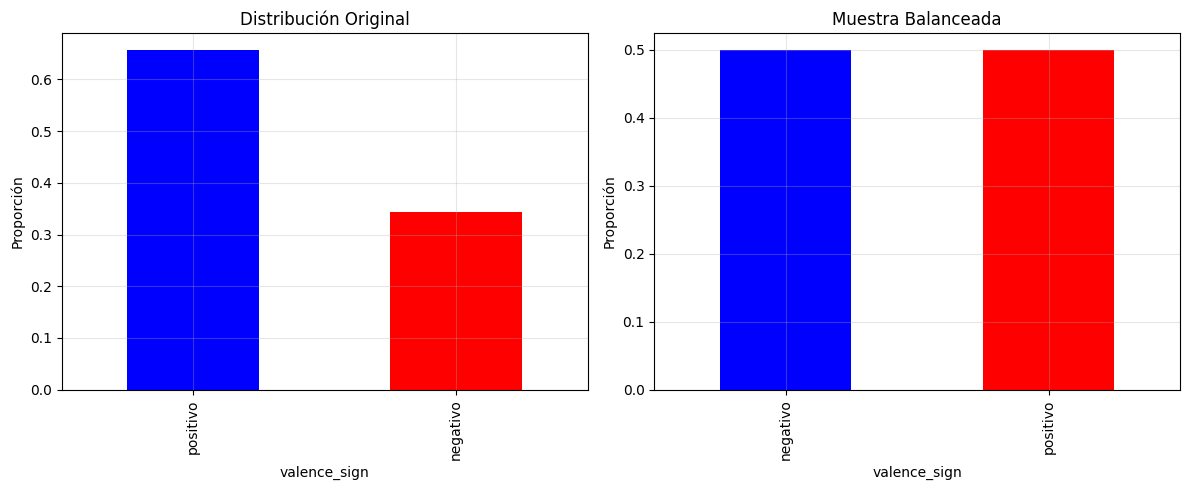

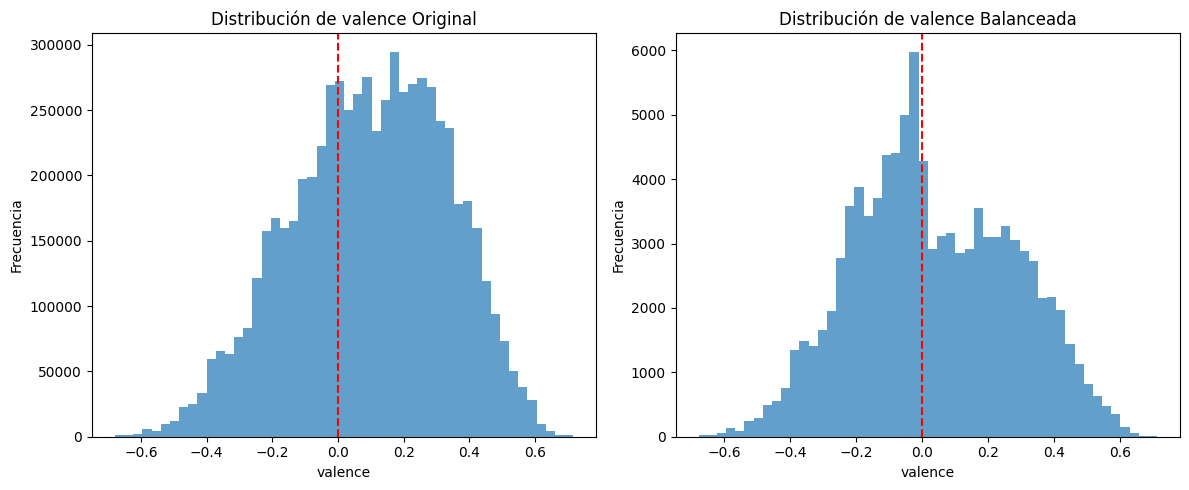


Dimensiones de la muestra balanceada: (100000, 264)


In [15]:
# 1. Primero, analizar la distribución de valence en todo el conjunto
# Clasificar como positivo o negativo
df_fvalence['valence_sign'] = np.where(df_fvalence['valence'] >= 0, 'positivo', 'negativo')

# Ver la distribución actual
distribucion_original = df_fvalence['valence_sign'].value_counts(normalize=True)
print("Distribución original de valence:")
print(distribucion_original)

# 2. Definir el tamaño de muestra que deseas
sample_size = 100000

# 3. Calcular cuántas muestras tomar de cada grupo para tener un 50/50
# (o puedes usar otra proporción si lo prefieres)
n_positivos = int(sample_size * 0.5)
n_negativos = sample_size - n_positivos

# 4. Dividir el DataFrame original por el signo de valence
df_positivos = df_fvalence[df_fvalence['valence'] >= 0]
df_negativos = df_fvalence[df_fvalence['valence'] < 0]

print(f"Total de valores positivos disponibles: {len(df_positivos)}")
print(f"Total de valores negativos disponibles: {len(df_negativos)}")

# 5. Tomar muestras aleatorias de cada grupo
positivos_sample = df_positivos.sample(n=n_positivos, random_state=42)
negativos_sample = df_negativos.sample(n=n_negativos, random_state=42)

# 6. Combinar las muestras
df_balanced_sample = pd.concat([positivos_sample, negativos_sample])

# 7. Barajar los datos para evitar que estén agrupados por clase
df_balanced_sample = df_balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# 8. Verificar la distribución en la muestra balanceada
distribucion_balanceada = df_balanced_sample['valence_sign'].value_counts(normalize=True)
print("\nDistribución en la muestra balanceada:")
print(distribucion_balanceada)

# 9. Visualizar la distribución
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
distribucion_original.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución Original')
plt.ylabel('Proporción')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
distribucion_balanceada.plot(kind='bar', color=['blue', 'red'])
plt.title('Muestra Balanceada')
plt.ylabel('Proporción')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 10. Visualizar la distribución de valores en ambos conjuntos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_fvalence['valence'], bins=50, alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de valence Original')
plt.xlabel('valence')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df_balanced_sample['valence'], bins=50, alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de valence Balanceada')
plt.xlabel('valence')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 11. Eliminar la columna auxiliar si ya no la necesitas
df_balanced_sample = df_balanced_sample.drop('valence_sign', axis=1)

# 12. Esta es tu muestra balanceada para usar en el entrenamiento
print(f"\nDimensiones de la muestra balanceada: {df_balanced_sample.shape}")

# Usar esta muestra para el entrenamiento del modelo
df_s_valence = df_balanced_sample

In [16]:
df_s_valence

frameTime  F0final_sma_stddev  F0final_sma_amean  \
0           43.0           33.377080           43.10572   
1           19.5           67.790440          186.00230   
2           42.0          200.173500          152.35450   
3           28.0          126.413300          129.89750   
4           33.0           10.310620          100.32250   
...          ...                 ...                ...   
99995       29.0           28.282150           37.29139   
99996       41.5           97.281880          197.70850   
99997       28.5            1.951088           96.36387   
99998       16.5          189.623300          154.45300   
99999       29.0           30.872080          105.21410   

       voicingFinalUnclipped_sma_stddev  voicingFinalUnclipped_sma_amean  \
0                              0.037403                         0.704624   
1                              0.038823                         0.820907   
2                              0.048858                         0.720802   
3                              0.046561                         0.737937   
4                              0.022195                         0.783535   
...                                 ...                              ...   
99995                          0.300019                         0.570114   
99996                          0.056350                         0.836097   
99997                          0.026857                         0.783943   
99998                          0.041329                         0.736115   
99999                          0.023986                         0.766467   

       jitterLocal_sma_stddev  jitterLocal_sma_amean  jitterDDP_sma_stddev  \
0                    0.077682               0.049242              0.085490   
1                    0.103121               0.096729              0.075358   
2                    0.093237               0.051714              0.098452   
3                    0.141038               0.098542              0.161903   
4                    0.078433               0.054876              0.108308   
...                       ...                    ...                   ...   
99995                0.137256               0.044534              0.107027   
99996                0.119561               0.073345              0.137433   
99997                0.056506               0.031034              0.036386   
99998                0.141620               0.072950              0.085740   
99999                0.140573               0.139642              0.208907   

       jitterDDP_sma_amean  shimmerLocal_sma_stddev  shimmerLocal_sma_amean  \
0                 0.050904                 0.102100                0.080715   
1                 0.064322                 0.173796                0.191966   
2                 0.038149                 0.107618                0.106606   
3                 0.099189                 0.113832                0.139548   
4                 0.054353                 0.141805                0.255950   
...                    ...                      ...                     ...   
99995             0.033924                 0.080422                0.057319   
99996             0.080824                 0.107517                0.209242   
99997             0.022825                 0.089183                0.128198   
99998             0.053514                 0.118192                0.119682   
99999             0.134876                 0.143808                0.202944   

       logHNR_sma_stddev  logHNR_sma_amean  audspec_lengthL1norm_sma_stddev  \
0              46.259480        -33.850140                         0.439450   
1               7.352069          4.896626                         0.752624   
2              48.465820        -33.798080                         0.394492   
3              37.555440        -16.154700                         0.766058   
4               1.683113          7.537043                         0.112781   
...                  ... 

Número de valores negativos: 50000 (50.00%)
Número de valores positivos: 50000 (50.00%)


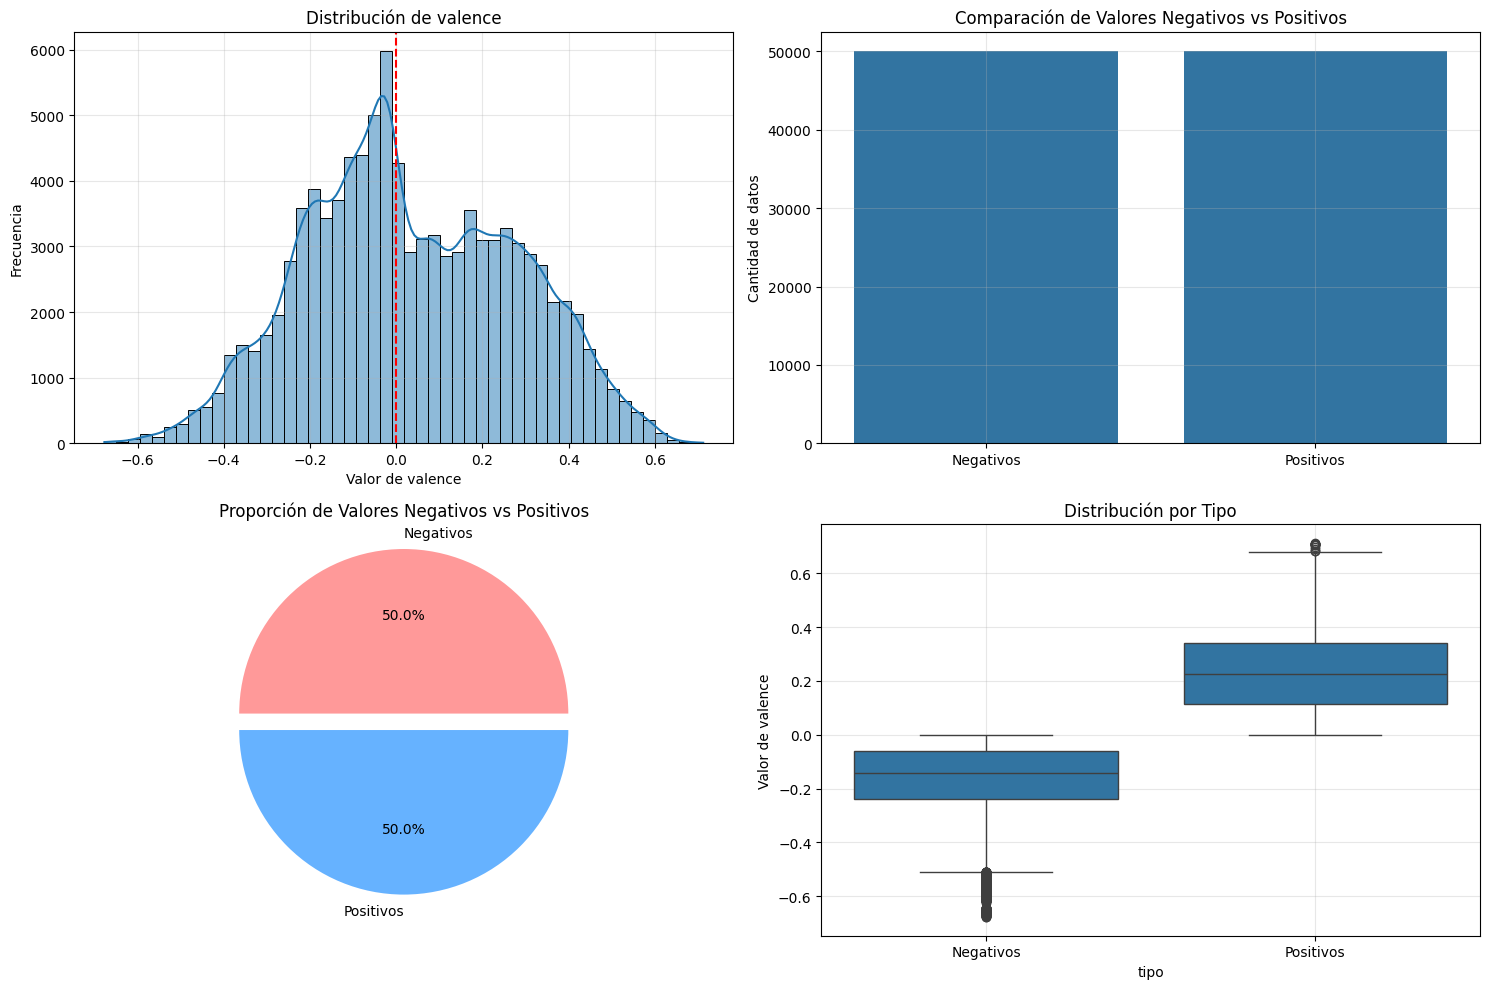


Estadísticas para valores negativos:
count    5.000000e+04
mean    -1.663530e-01
std      1.264182e-01
min     -6.769080e-01
25%     -2.403159e-01
50%     -1.430000e-01
75%     -6.100000e-02
max     -6.938894e-19
Name: valence, dtype: float64

Estadísticas para valores positivos:
count    50000.000000
mean         0.234946
std          0.145534
min          0.000000
25%          0.113000
50%          0.225000
75%          0.340000
max          0.712000
Name: valence, dtype: float64


In [17]:
# Primero, veamos cuántos valores negativos y positivos hay
valores_negativos = df_s_valence[df_s_valence['valence'] < 0]
valores_positivos = df_s_valence[df_s_valence['valence'] >= 0]

num_negativos = len(valores_negativos)
num_positivos = len(valores_positivos)

print(f"Número de valores negativos: {num_negativos} ({num_negativos/len(df_s_valence)*100:.2f}%)")
print(f"Número de valores positivos: {num_positivos} ({num_positivos/len(df_s_valence)*100:.2f}%)")

# Crear una visualización más completa
plt.figure(figsize=(15, 10))

# 1. Histograma general con separación de valores positivos y negativos
plt.subplot(2, 2, 1)
sns.histplot(df_s_valence['valence'], bins=50, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de valence')
plt.xlabel('Valor de valence')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# 2. Gráfico de barras comparando cantidad de valores negativos y positivos
plt.subplot(2, 2, 2)
sns.barplot(x=['Negativos', 'Positivos'], y=[num_negativos, num_positivos])
plt.title('Comparación de Valores Negativos vs Positivos')
plt.ylabel('Cantidad de datos')
plt.grid(True, alpha=0.3)

# 3. Gráfico de pastel mostrando la proporción
plt.subplot(2, 2, 3)
plt.pie([num_negativos, num_positivos], 
        labels=['Negativos', 'Positivos'], 
        autopct='%1.1f%%', 
        colors=['#FF9999', '#66B2FF'],
        explode=[0.1, 0])
plt.title('Proporción de Valores Negativos vs Positivos')

# 4. Boxplot para ver la distribución de valores negativos y positivos
plt.subplot(2, 2, 4)
# Creamos una columna temporal para identificar negativos y positivos
temp_df = pd.DataFrame({
    'valence': df_s_valence['valence'],
    'tipo': np.where(df_s_valence['valence'] < 0, 'Negativos', 'Positivos')
})
sns.boxplot(x='tipo', y='valence', data=temp_df)
plt.title('Distribución por Tipo')
plt.ylabel('Valor de valence')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Adicionalmente, si quieres ver estadísticas para ambos grupos:
print("\nEstadísticas para valores negativos:")
print(valores_negativos['valence'].describe())

print("\nEstadísticas para valores positivos:")
print(valores_positivos['valence'].describe())

MODELO VALENCE SIN PCA

In [18]:
def entrenar_modelo_con_todas_caracteristicas(X, y_valence):
    """
    Entrena un modelo utilizando todas las características disponibles.
    
    Parámetros:
    -----------
    X : DataFrame
        Características completas
    y_valence : Series
        Variable objetivo (arousal)
        
    Retorna:
    --------
    resultados : dict
        Diccionario con los resultados de evaluación para cada modelo
    mejor_modelo : object
        El mejor modelo entrenado
    componentes : dict
        Componentes necesarios para usar el modelo
    """
    print("\nEntrenando modelos con TODAS las características originales...")
    print(f"Dimensión de datos para entrenamiento: {X.shape}")
    
    # Definir modelos para evaluar
    modelos = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
    }
    
    # Configurar validación cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Resultados por modelo
    resultados = {}
    
    for nombre, modelo in modelos.items():
        inicio = time.time()  # Medir tiempo de ejecución
        print(f"\nEvaluando {nombre}...")
        
        # Métricas por fold
        r2_scores = []
        rmse_scores = []
        ccc_scores = []
        
        # Validación cruzada
        for i, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y_valence.iloc[train_idx], y_valence.iloc[test_idx]
            
            # Escalar características
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Entrenar modelo
            modelo.fit(X_train_scaled, y_train)
            
            # Predecir
            y_pred = modelo.predict(X_test_scaled)
            
            # Calcular métricas
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            ccc = calcular_ccc(y_test, y_pred)
            
            # Guardar métricas
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            ccc_scores.append(ccc)
            
            print(f"  Fold {i+1}: R²={r2:.4f}, RMSE={rmse:.4f}, CCC={ccc:.4f}")
        
        # Promedios
        r2_medio = np.mean(r2_scores)
        rmse_medio = np.mean(rmse_scores)
        ccc_medio = np.mean(ccc_scores)
        
        tiempo_total = time.time() - inicio
        
        print(f"  Promedio: R²={r2_medio:.4f}, RMSE={rmse_medio:.4f}, CCC={ccc_medio:.4f}")
        print(f"  Tiempo de ejecución: {tiempo_total:.2f} segundos")
        
        resultados[nombre] = {
            'R2': r2_medio,
            'RMSE': rmse_medio,
            'CCC': ccc_medio,
            'R2_std': np.std(r2_scores),
            'RMSE_std': np.std(rmse_scores),
            'CCC_std': np.std(ccc_scores),
            'Tiempo': tiempo_total
        }
    
    # Determinar mejor modelo (basado en CCC)
    mejor_modelo_nombre = max(resultados, key=lambda k: resultados[k]['CCC'])
    
    print("\n" + "="*50)
    print(f"Mejor modelo: {mejor_modelo_nombre}")
    print(f"CCC: {resultados[mejor_modelo_nombre]['CCC']:.4f} ± {resultados[mejor_modelo_nombre]['CCC_std']:.4f}")
    print(f"R²: {resultados[mejor_modelo_nombre]['R2']:.4f} ± {resultados[mejor_modelo_nombre]['R2_std']:.4f}")
    print(f"RMSE: {resultados[mejor_modelo_nombre]['RMSE']:.4f} ± {resultados[mejor_modelo_nombre]['RMSE_std']:.4f}")
    print(f"Tiempo: {resultados[mejor_modelo_nombre]['Tiempo']:.2f} segundos")
    print("="*50)
    
    # Entrenar modelo final con todos los datos
    modelo_final = modelos[mejor_modelo_nombre]
    scaler_final = StandardScaler()
    X_scaled = scaler_final.fit_transform(X)
    modelo_final.fit(X_scaled, y_valence)
    
    # Guardar modelo y componentes
    componentes = {
        'modelo': modelo_final,
        'scaler': scaler_final,
        'caracteristicas': list(X.columns),
        'metricas': resultados[mejor_modelo_nombre]
    }
    
    # Guardar modelo
    nombre_archivo = f"modelo_valence_{mejor_modelo_nombre.replace(' ', '_').lower()}_todas_caracteristicas.joblib"
    joblib.dump(componentes, nombre_archivo)
    print(f"\nModelo guardado como: {nombre_archivo}")
    
    return resultados, modelo_final, componentes

def calcular_ccc(y_true, y_pred):
    """
    Calcula el Coeficiente de Correlación de Concordancia (CCC).
    
    Esta métrica es más adecuada para tareas de predicción de emociones que R².
    """
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    
    covariance = np.cov(y_true, y_pred)[0, 1]
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred) ** 2)
    
    return ccc

In [19]:
# Preparar datos
print("Preparando datos...")
X = df_s_valence.drop(['frameTime','song_id','sample'], axis=1)
if 'valence' in X.columns:
    y_valence = X['valence']
    X = X.drop(['valence'], axis=1)
else:
    y_valence = None
    print("ADVERTENCIA: No se encontró la columna 'valence' en los datos.")

print(f"Datos cargados: {X.shape[0]} muestras con {X.shape[1]} características")

# Entrenar modelo con todas las características
resultados, mejor_modelo, componentes = entrenar_modelo_con_todas_caracteristicas(X, y_valence)

# Tabla comparativa de modelos
print("\nTabla comparativa de modelos:")
print(f"{'Modelo':<20} {'CCC':<15} {'R²':<15} {'RMSE':<15}")
print("-"*65)
for nombre, metricas in sorted(resultados.items(), key=lambda x: x[1]['CCC'], reverse=True):
    print(f"{nombre:<20} {metricas['CCC']:.4f} ± {metricas['CCC_std']:.4f}   {metricas['R2']:.4f} ± {metricas['R2_std']:.4f}   {metricas['RMSE']:.4f} ± {metricas['RMSE_std']:.4f}")

print("\nProceso completado!")

Preparando datos...
Datos cargados: 100000 muestras con 260 características

Entrenando modelos con TODAS las características originales...
Dimensión de datos para entrenamiento: (100000, 260)

Evaluando Linear Regression...
  Fold 1: R²=0.3083, RMSE=0.2020, CCC=0.4779
  Fold 2: R²=0.3167, RMSE=0.2007, CCC=0.4789
  Fold 3: R²=0.3091, RMSE=0.2018, CCC=0.4741
  Fold 4: R²=0.2990, RMSE=0.2017, CCC=0.4726
  Fold 5: R²=0.3117, RMSE=0.2020, CCC=0.4755
  Promedio: R²=0.3090, RMSE=0.2016, CCC=0.4758
  Tiempo de ejecución: 9.24 segundos

Evaluando Ridge...
  Fold 1: R²=0.3084, RMSE=0.2020, CCC=0.4778
  Fold 2: R²=0.3166, RMSE=0.2007, CCC=0.4788
  Fold 3: R²=0.3090, RMSE=0.2018, CCC=0.4740
  Fold 4: R²=0.2993, RMSE=0.2017, CCC=0.4725
  Fold 5: R²=0.3117, RMSE=0.2020, CCC=0.4754
  Promedio: R²=0.3090, RMSE=0.2016, CCC=0.4757
  Tiempo de ejecución: 2.73 segundos

Evaluando Random Forest...
  Fold 1: R²=0.7640, RMSE=0.1180, CCC=0.8509
  Fold 2: R²=0.7665, RMSE=0.1173, CCC=0.8519
  Fold 3: R²=0.7644

In [34]:
def predecir_emocion_desde_csv(csv_caracteristicas, ruta_modelo, columna_id=None):
    """
    Predice arousal/valence a partir de un CSV con características extraídas.
    
    Parámetros:
    -----------
    csv_caracteristicas : str
        Ruta al archivo CSV con las características extraídas
    ruta_modelo : str
        Ruta al archivo del modelo guardado (.joblib)
    columna_id : str, opcional
        Nombre de la columna que contiene identificadores (si existe)
        
    Retorna:
    --------
    pandas.DataFrame: Predicciones con identificadores (si se proporcionaron)
    """
    # 1. Cargar el modelo y componentes
    print(f"Cargando modelo desde {ruta_modelo}...")
    componentes = joblib.load(ruta_modelo)
    
    modelo = componentes['modelo']
    scaler = componentes['scaler']
    caracteristicas_modelo = componentes['caracteristicas']
    
    # 2. Cargar características desde CSV
    print(f"Cargando características desde {csv_caracteristicas}...")
    df = pd.read_csv(csv_caracteristicas)
    
    print("Preparando características para predicción...")
    
    # 3. Seleccionar directamente las características necesarias
    # Verificar si todas las características necesarias están presentes
    caracteristicas_faltantes = set(caracteristicas_modelo) - set(df.columns)
    if caracteristicas_faltantes:
        print(f"ADVERTENCIA: Faltan {len(caracteristicas_faltantes)} características en el CSV.")
        if len(caracteristicas_faltantes) <= 5:
            print(f"Características faltantes: {caracteristicas_faltantes}")
        else:
            print(f"Primeras 5 faltantes: {list(caracteristicas_faltantes)[:5]}")
    
    # 4. Crear DataFrame con características en el orden correcto (versión optimizada)
    # Preparar datos para todas las características de una vez
    datos_pred = {}
    for caract in caracteristicas_modelo:
        if caract in df.columns:
            datos_pred[caract] = df[caract].values
        else:
            datos_pred[caract] = np.zeros(len(df))
    
    # Crear DataFrame de una sola vez
    X_pred = pd.DataFrame(datos_pred)
    
    # 5. Escalar características
    X_scaled = scaler.transform(X_pred)
    
    # 6. Realizar predicciones
    print("Realizando predicciones...")
    predicciones = modelo.predict(X_scaled)
    
    # 7. Crear DataFrame de resultados
    if columna_id is not None and columna_id in df.columns:
        resultados = pd.DataFrame({
            'ID': df[columna_id],
            'prediccion': predicciones
        })
    else:
        resultados = pd.DataFrame({
            'prediccion': predicciones
        })
    
    # Determinar tipo de emoción basado en nombre del modelo
    emocion = 'arousal' if 'arousal' in ruta_modelo.lower() else 'valence'
    resultados.rename(columns={'prediccion': emocion}, inplace=True)
    
    print(f"Predicciones de {emocion} completadas.")
    return resultados


# Ejemplo de uso
def main():
    # Rutas a archivos
    csv_caracteristicas = "booyah.csv"
    ruta_modelo_arousal = "modelo_arousal_random_forest_todas_caracteristicas.joblib"
    ruta_modelo_valence = "modelo_valence_random_forest_todas_caracteristicas.joblib"
    
    # Cargar CSV y resolver discrepancias de nombres
    print("Cargando CSV y preparando datos...")
    df_original = pd.read_csv(csv_caracteristicas)
    
    # Identificar columna ID si existe
    columna_id = None
    for posible_id in ['song_id', 'sample', 'ID', 'filename']:
        if posible_id in df_original.columns:
            columna_id = posible_id
            break
    
    # Predicción de arousal
    print("\n=== PREDICCIÓN DE AROUSAL ===")
    resultados_arousal = predecir_emocion_desde_csv(
        csv_caracteristicas, 
        ruta_modelo_arousal,
        columna_id
    )
    
    # Predicción de valence
    print("\n=== PREDICCIÓN DE VALENCE ===")
    resultados_valence = predecir_emocion_desde_csv(
        csv_caracteristicas, 
        ruta_modelo_valence,
        columna_id
    )
    
    # Combinar resultados
    if columna_id:
        resultados_combinados = resultados_arousal.merge(
            resultados_valence, on='ID'
        )
    else:
        # Si no hay ID, asumir mismo orden
        resultados_combinados = resultados_arousal.copy()
        resultados_combinados['valence'] = resultados_valence['valence']
    
    # Guardar resultados
    resultados_combinados.to_csv("predicciones_emocionales.csv", index=False)
    
    print("\n=== RESUMEN DE PREDICCIONES ===")
    print(f"Total de predicciones: {len(resultados_combinados)}")
    
    if len(resultados_combinados) > 0:
        print("\nEstadísticas de predicciones:")
        print(f"Arousal - Media: {resultados_combinados['arousal'].mean():.4f}, "
              f"Min: {resultados_combinados['arousal'].min():.4f}, "
              f"Max: {resultados_combinados['arousal'].max():.4f}")
        print(f"Valence - Media: {resultados_combinados['valence'].mean():.4f}, "
              f"Min: {resultados_combinados['valence'].min():.4f}, "
              f"Max: {resultados_combinados['valence'].max():.4f}")
        
        print("\nPrimeras 5 predicciones:")
        print(resultados_combinados.head())
    
    print(f"\nPredicciones guardadas en: predicciones_emocionales.csv")
    
    return resultados_combinados

if __name__ == "__main__":
    resultados = main()

Cargando CSV y preparando datos...

=== PREDICCIÓN DE AROUSAL ===
Cargando modelo desde modelo_arousal_random_forest_todas_caracteristicas.joblib...
Cargando características desde booyah.csv...
Preparando características para predicción...
Realizando predicciones...
Predicciones de arousal completadas.

=== PREDICCIÓN DE VALENCE ===
Cargando modelo desde modelo_valence_random_forest_todas_caracteristicas.joblib...
Cargando características desde booyah.csv...
Preparando características para predicción...
Realizando predicciones...
Predicciones de valence completadas.

=== RESUMEN DE PREDICCIONES ===
Total de predicciones: 100

Estadísticas de predicciones:
Arousal - Media: 0.3237, Min: -0.1942, Max: 0.5555
Valence - Media: 0.1690, Min: -0.1168, Max: 0.4007

Primeras 5 predicciones:
    arousal   valence
0  0.465734  0.231706
1  0.484389  0.169320
2  0.485717  0.239455
3  0.520118  0.207538
4  0.488278  0.260915

Predicciones guardadas en: predicciones_emocionales.csv


In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('predicciones_emocionales.csv')
df

arousal   valence
0   0.465734  0.231706
1   0.484389  0.169320
2   0.485717  0.239455
3   0.520118  0.207538
4   0.488278  0.260915
..       ...       ...
95  0.369821  0.175570
96  0.376282  0.230088
97  0.361451  0.171419
98  0.438660  0.279358
99  0.469195  0.244343

[100 rows x 2 columns]

Archivos cargados correctamente.
Canciones: 100 filas, columnas: arousal, valence
Anuncios: 34 filas, columnas: arousal, valence
Canción - Frametime (15.0, 45.5):
  Arousal promedio: 0.3237
  Valence promedio: 0.1690
  Frames: 100

Anuncio - Frametime (15.0, 45.5):
  Arousal promedio: 0.3393
  Valence promedio: 0.1137
  Frames: 34

Análisis de compatibilidad:
  Diferencia Arousal promedio: 0.2361
  Diferencia Valence promedio: 0.1370
  Diferencia ponderada promedio: 0.2063
  Frames disruptivos: 32 de 100 (32.00%)
  Estado: Disruptivo


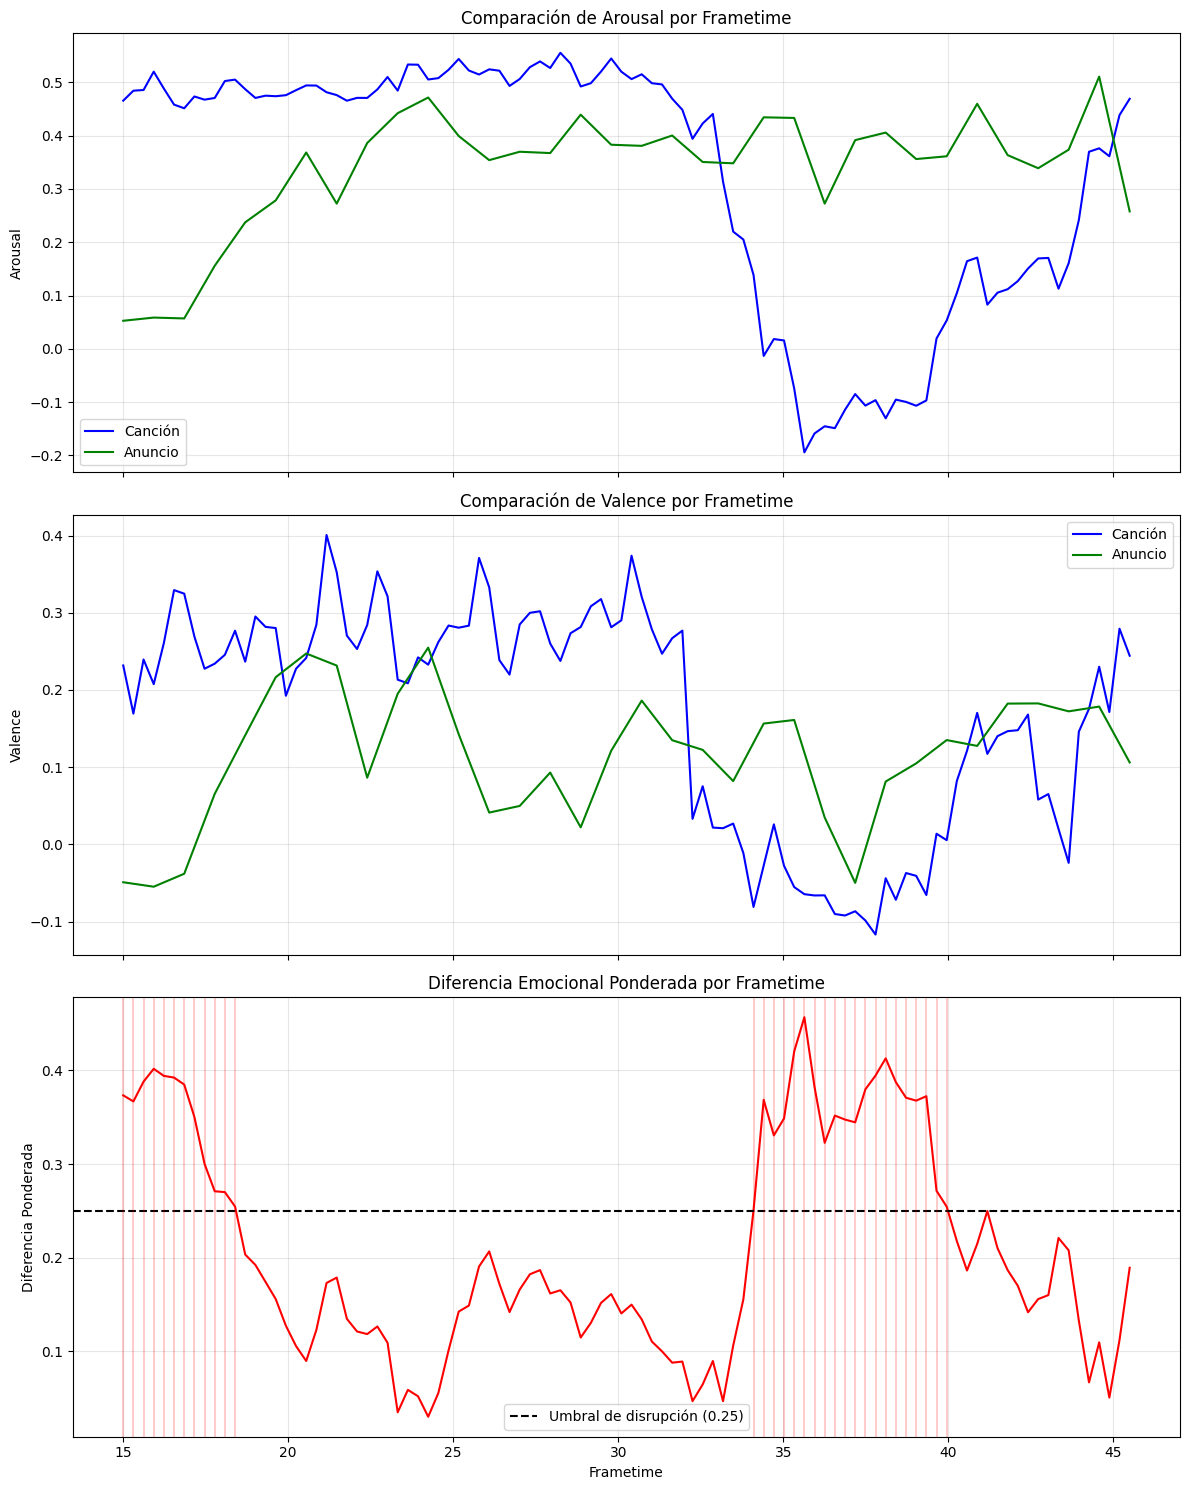

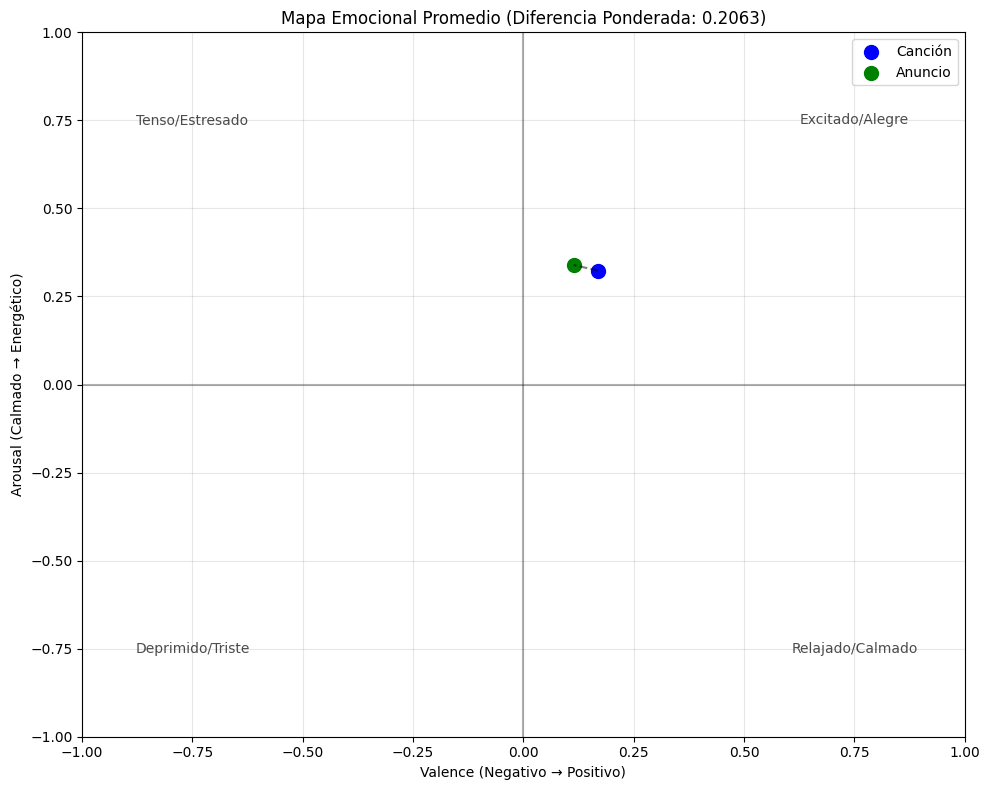

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def seleccionar_anuncio_compatible_por_frametime(df_cancion, df_anuncio, 
                                               rango_frametime=(15.0, 45.5),
                                               peso_arousal=0.7, 
                                               umbral_disrupcion=0.25, 
                                               mostrar_grafica=False):
    """
    Selecciona si un anuncio es compatible emocionalmente con una canción
    considerando todos los frametimes en un rango específico.
    
    Parámetros:
    -----------
    df_cancion : DataFrame
        DataFrame con columnas 'arousal' y 'valence' de la canción
    df_anuncio : DataFrame
        DataFrame con columnas 'arousal' y 'valence' del anuncio
    rango_frametime : tuple
        Rango de frametimes a considerar (inicio, fin)
    peso_arousal : float
        Peso relativo del arousal en la selección (entre 0 y 1)
    umbral_disrupcion : float
        Umbral máximo de diferencia ponderada permitido
    mostrar_grafica : bool
        Si es True, muestra una gráfica de comparación emocional por frametime
        
    Retorna:
    --------
    dict: Información de compatibilidad entre la canción y el anuncio
    """
    # Asegurar que los pesos suman 1
    peso_valence = 1 - peso_arousal
    
    # Crear frametimes si no existen
    if 'frametime' not in df_cancion.columns:
        inicio, fin = rango_frametime
        incremento = (fin - inicio) / (len(df_cancion) - 1) if len(df_cancion) > 1 else 0
        df_cancion = df_cancion.copy()
        df_cancion['frametime'] = [inicio + i * incremento for i in range(len(df_cancion))]
    
    if 'frametime' not in df_anuncio.columns:
        inicio, fin = rango_frametime
        incremento = (fin - inicio) / (len(df_anuncio) - 1) if len(df_anuncio) > 1 else 0
        df_anuncio = df_anuncio.copy()
        df_anuncio['frametime'] = [inicio + i * incremento for i in range(len(df_anuncio))]
    
    # Filtrar por rango de frametime
    df_cancion = df_cancion[(df_cancion['frametime'] >= rango_frametime[0]) & 
                           (df_cancion['frametime'] <= rango_frametime[1])]
    
    df_anuncio = df_anuncio[(df_anuncio['frametime'] >= rango_frametime[0]) & 
                           (df_anuncio['frametime'] <= rango_frametime[1])]
    
    # Estadísticas resumidas
    arousal_cancion_avg = df_cancion['arousal'].mean()
    valence_cancion_avg = df_cancion['valence'].mean()
    arousal_anuncio_avg = df_anuncio['arousal'].mean()
    valence_anuncio_avg = df_anuncio['valence'].mean()
    
    print(f"Canción - Frametime {rango_frametime}:")
    print(f"  Arousal promedio: {arousal_cancion_avg:.4f}")
    print(f"  Valence promedio: {valence_cancion_avg:.4f}")
    print(f"  Frames: {len(df_cancion)}")
    
    print(f"\nAnuncio - Frametime {rango_frametime}:")
    print(f"  Arousal promedio: {arousal_anuncio_avg:.4f}")
    print(f"  Valence promedio: {valence_anuncio_avg:.4f}")
    print(f"  Frames: {len(df_anuncio)}")
    
    # Calcular compatibilidad en cada frametime común
    # Necesitamos interpolar frametimes para comparar punto a punto
    all_frametimes = sorted(set(df_cancion['frametime'].tolist() + df_anuncio['frametime'].tolist()))
    
    # Interpolar valores para la canción
    arousal_interp_cancion = np.interp(
        all_frametimes, 
        df_cancion['frametime'], 
        df_cancion['arousal']
    )
    
    valence_interp_cancion = np.interp(
        all_frametimes, 
        df_cancion['frametime'], 
        df_cancion['valence']
    )
    
    # Interpolar valores para el anuncio
    arousal_interp_anuncio = np.interp(
        all_frametimes, 
        df_anuncio['frametime'], 
        df_anuncio['arousal']
    )
    
    valence_interp_anuncio = np.interp(
        all_frametimes, 
        df_anuncio['frametime'], 
        df_anuncio['valence']
    )
    
    # Calcular diferencias en cada frametime
    diferencias = []
    for i, ft in enumerate(all_frametimes):
        dif_arousal = abs(arousal_interp_cancion[i] - arousal_interp_anuncio[i])
        dif_valence = abs(valence_interp_cancion[i] - valence_interp_anuncio[i])
        dif_ponderada = peso_arousal * dif_arousal + peso_valence * dif_valence
        
        diferencias.append({
            'frametime': ft,
            'dif_arousal': dif_arousal,
            'dif_valence': dif_valence,
            'dif_ponderada': dif_ponderada,
            'es_disruptivo': dif_ponderada > umbral_disrupcion
        })
    
    # Convertir a DataFrame para análisis
    df_diferencias = pd.DataFrame(diferencias)
    
    # Calcular estadísticas generales
    dif_arousal_avg = df_diferencias['dif_arousal'].mean()
    dif_valence_avg = df_diferencias['dif_valence'].mean()
    dif_ponderada_avg = df_diferencias['dif_ponderada'].mean()
    frames_disruptivos = df_diferencias['es_disruptivo'].sum()
    porcentaje_disruptivo = (frames_disruptivos / len(df_diferencias)) * 100
    
    # Determinar compatibilidad general
    es_compatible = dif_ponderada_avg <= umbral_disrupcion and porcentaje_disruptivo < 30
    
    resultado = {
        'dif_arousal_avg': dif_arousal_avg,
        'dif_valence_avg': dif_valence_avg,
        'dif_ponderada_avg': dif_ponderada_avg,
        'frames_totales': len(df_diferencias),
        'frames_disruptivos': frames_disruptivos,
        'porcentaje_disruptivo': porcentaje_disruptivo,
        'es_compatible': es_compatible,
        'estado': 'Compatible' if es_compatible else 'Disruptivo'
    }
    
    print("\nAnálisis de compatibilidad:")
    print(f"  Diferencia Arousal promedio: {dif_arousal_avg:.4f}")
    print(f"  Diferencia Valence promedio: {dif_valence_avg:.4f}")
    print(f"  Diferencia ponderada promedio: {dif_ponderada_avg:.4f}")
    print(f"  Frames disruptivos: {frames_disruptivos} de {len(df_diferencias)} ({porcentaje_disruptivo:.2f}%)")
    print(f"  Estado: {resultado['estado']}")
    
    # Visualización opcional
    if mostrar_grafica:
        visualizar_comparacion_por_frametime(
            all_frametimes,
            arousal_interp_cancion, valence_interp_cancion,
            arousal_interp_anuncio, valence_interp_anuncio,
            df_diferencias,
            umbral_disrupcion
        )
        
        # También mostrar el mapa emocional promedio
        visualizar_mapa_emocional_promedio(
            arousal_cancion_avg, valence_cancion_avg,
            arousal_anuncio_avg, valence_anuncio_avg,
            dif_ponderada_avg
        )
    
    return resultado

def visualizar_comparacion_por_frametime(frametimes, 
                                       arousal_cancion, valence_cancion,
                                       arousal_anuncio, valence_anuncio,
                                       df_diferencias,
                                       umbral_disrupcion):
    """
    Visualiza la comparación de emociones por frametime.
    """
    fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
    
    # Gráfica de Arousal
    axes[0].plot(frametimes, arousal_cancion, 'b-', label='Canción')
    axes[0].plot(frametimes, arousal_anuncio, 'g-', label='Anuncio')
    axes[0].set_ylabel('Arousal')
    axes[0].set_title('Comparación de Arousal por Frametime')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # Gráfica de Valence
    axes[1].plot(frametimes, valence_cancion, 'b-', label='Canción')
    axes[1].plot(frametimes, valence_anuncio, 'g-', label='Anuncio')
    axes[1].set_ylabel('Valence')
    axes[1].set_title('Comparación de Valence por Frametime')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    # Gráfica de Diferencia Ponderada
    axes[2].plot(frametimes, df_diferencias['dif_ponderada'], 'r-')
    axes[2].axhline(y=umbral_disrupcion, color='k', linestyle='--', 
                   label=f'Umbral de disrupción ({umbral_disrupcion})')
    
    # Colorear áreas disruptivas
    disruptivos = df_diferencias[df_diferencias['es_disruptivo']]
    for _, fila in disruptivos.iterrows():
        axes[2].axvline(x=fila['frametime'], color='r', alpha=0.2)
    
    axes[2].set_xlabel('Frametime')
    axes[2].set_ylabel('Diferencia Ponderada')
    axes[2].set_title('Diferencia Emocional Ponderada por Frametime')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()

def visualizar_mapa_emocional_promedio(arousal_cancion, valence_cancion,
                                     arousal_anuncio, valence_anuncio,
                                     diferencia_ponderada):
    """
    Visualiza el mapa emocional promedio de la canción y el anuncio.
    """
    plt.figure(figsize=(10, 8))
    
    # Configurar límites y ejes
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.grid(alpha=0.3)
    
    # Etiquetas
    plt.xlabel('Valence (Negativo → Positivo)')
    plt.ylabel('Arousal (Calmado → Energético)')
    plt.title('Mapa Emocional Promedio: Canción y Anuncio')
    
    # Añadir cuadrantes emocionales
    cuadrantes = {
        'Tenso/Estresado': [-0.75, 0.75],
        'Excitado/Alegre': [0.75, 0.75],
        'Deprimido/Triste': [-0.75, -0.75],
        'Relajado/Calmado': [0.75, -0.75],
    }
    
    for emocion, (x, y) in cuadrantes.items():
        plt.text(x, y, emocion, ha='center', va='center', alpha=0.7)
    
    # Graficar canción y anuncio
    plt.scatter(valence_cancion, arousal_cancion, color='blue', s=100, label='Canción')
    plt.scatter(valence_anuncio, arousal_anuncio, color='green', s=100, label='Anuncio')
    
    # Dibujar línea de conexión
    plt.plot([valence_cancion, valence_anuncio], [arousal_cancion, arousal_anuncio], 
             'k--', alpha=0.5)
    
    # Añadir información de diferencia
    plt.title(f'Mapa Emocional Promedio (Diferencia Ponderada: {diferencia_ponderada:.4f})')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

# Función principal para pruebas
def main():
    # Cargar predicciones
    try:
        df_canciones = pd.read_csv("predicciones_canciones.csv")
        df_anuncios = pd.read_csv("predicciones_anuncios.csv")
        
        print("Archivos cargados correctamente.")
        print(f"Canciones: {len(df_canciones)} filas, columnas: {', '.join(df_canciones.columns)}")
        print(f"Anuncios: {len(df_anuncios)} filas, columnas: {', '.join(df_anuncios.columns)}")
        
        # Verificar que existan las columnas necesarias
        for df, nombre in [(df_canciones, "canciones"), (df_anuncios, "anuncios")]:
            if 'arousal' not in df.columns or 'valence' not in df.columns:
                print(f"ERROR: El archivo de {nombre} debe contener las columnas 'arousal' y 'valence'")
                return None
                
        # Analizar compatibilidad considerando todos los frametimes
        resultado = seleccionar_anuncio_compatible_por_frametime(
            df_canciones,
            df_anuncios,
            rango_frametime=(15.0, 45.5),
            peso_arousal=0.7,
            umbral_disrupcion=0.25,
            mostrar_grafica=True
        )
        
        return resultado
        
    except Exception as e:
        print(f"Error: {e}")
        return None

if __name__ == "__main__":
    resultado = main()
